# Задача

- Предсказание сердечной недостаточности.

```
Целевая переменная: HeartDisease
```

# Анализ данных

In [31]:
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv("./heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# Age: возраст пациента
# Sex: пол пациента [M: Мужчина, F: женщина]
# ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: нестенокардитическая боль, ASY: бессимптомная]
# Артериальное давление в состоянии покоя: кровяное давление в состоянии покоя [мм рт. ст.]
# Уровень холестерина: сывороточный холестерин [мм / дл]
# FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]
# RestingECG - ЭКГ в состоянии покоя: результаты электрокардиограммы в состоянии покоя [норма: норма, ST: наличие отклонений ST-T (инверсии зубца T и/или подъем или депрессия сегмента ST более 0,05 мВ), ГЛЖ: вероятная или явная гипертрофия левого желудочка по критериям Эстеса]
# MaxHR: максимальная частота сердечных сокращений [числовое значение от 60 до 202]
# Стенокардия напряжения: стенокардия, вызванная физической нагрузкой [Y: да, N: нет]
# Oldpeak: oldpeak = ST [Числовое значение, измеряемое при депрессии]
# ST_Slope: наклон пикового сегмента ST [Вверх: восходящий, Плоский: горизонтальный, Вниз: нисходящий]
# HeartDisease: целевая переменная [1: heart disease, 0: Normal]

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Проверим наличие пропущенных значений
# Пропущенные значения отсутствуют
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


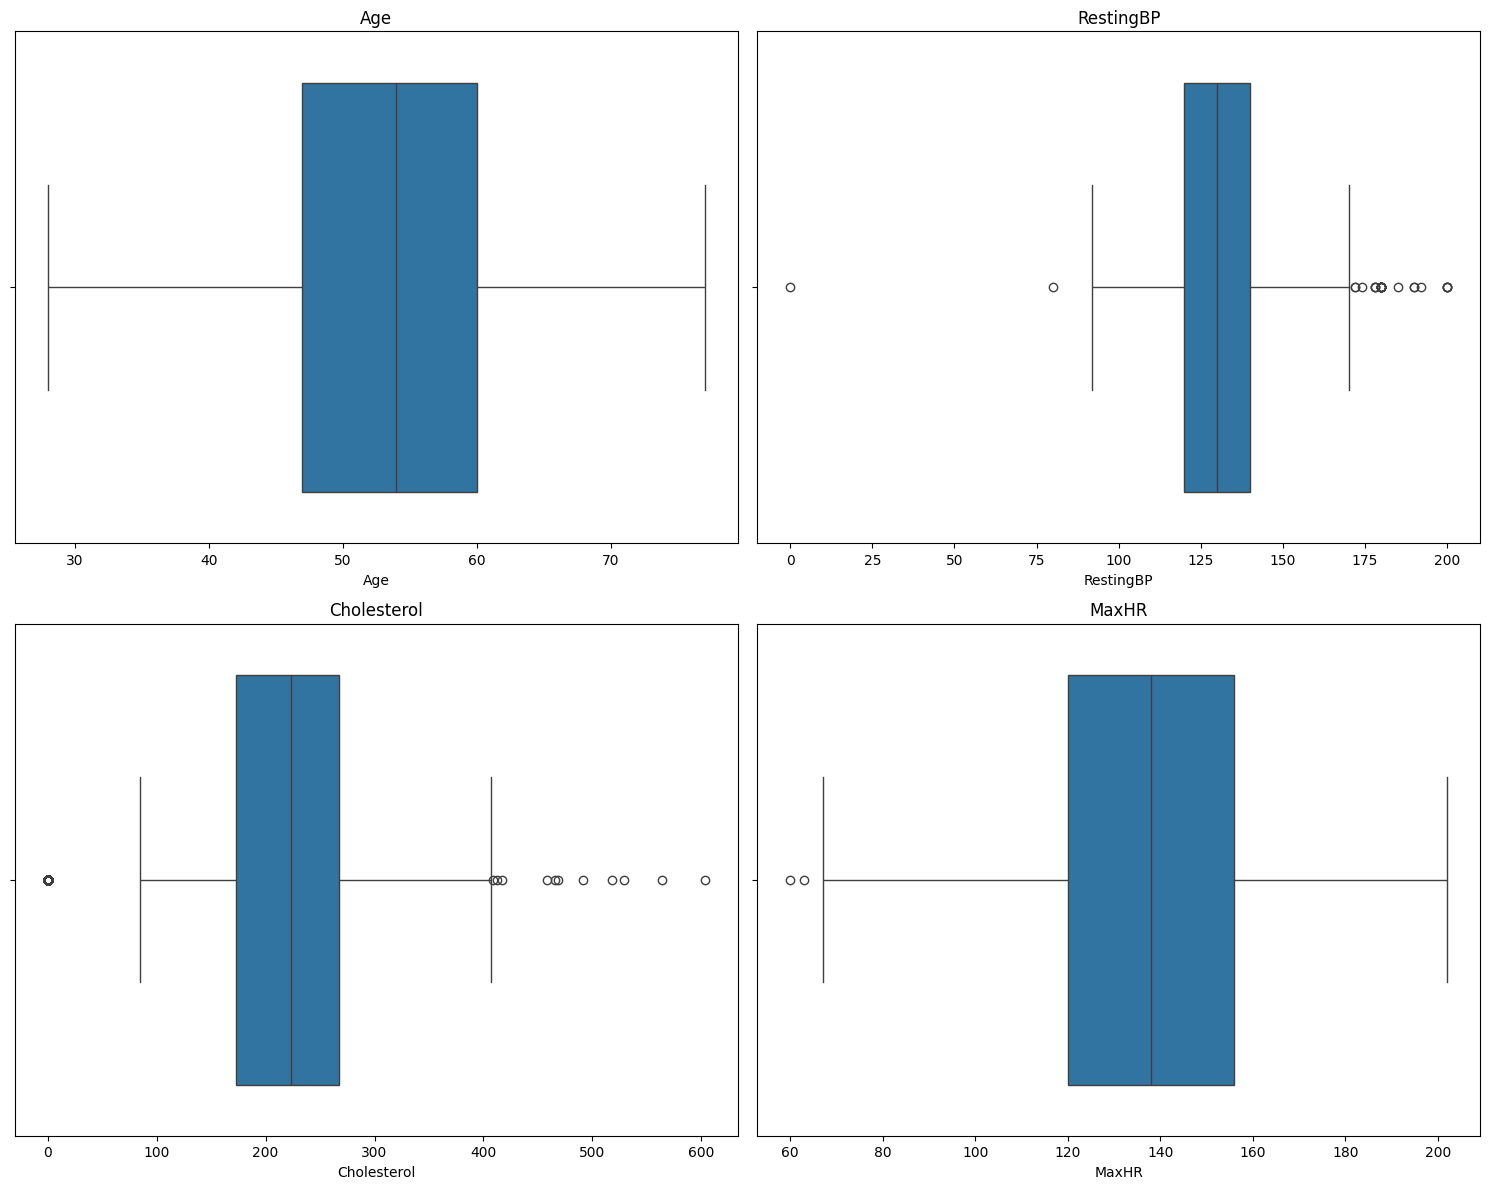

In [7]:
# Строим box-plot, чтобы посмотреть на выбросы
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.boxplot(x=df['RestingBP'], ax=axes[0, 1])
axes[0, 1].set_title('RestingBP')

sns.boxplot(x=df['Cholesterol'], ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol')

sns.boxplot(x=df['MaxHR'], ax=axes[1, 1])
axes[1, 1].set_title('MaxHR')

plt.tight_layout()
plt.show()

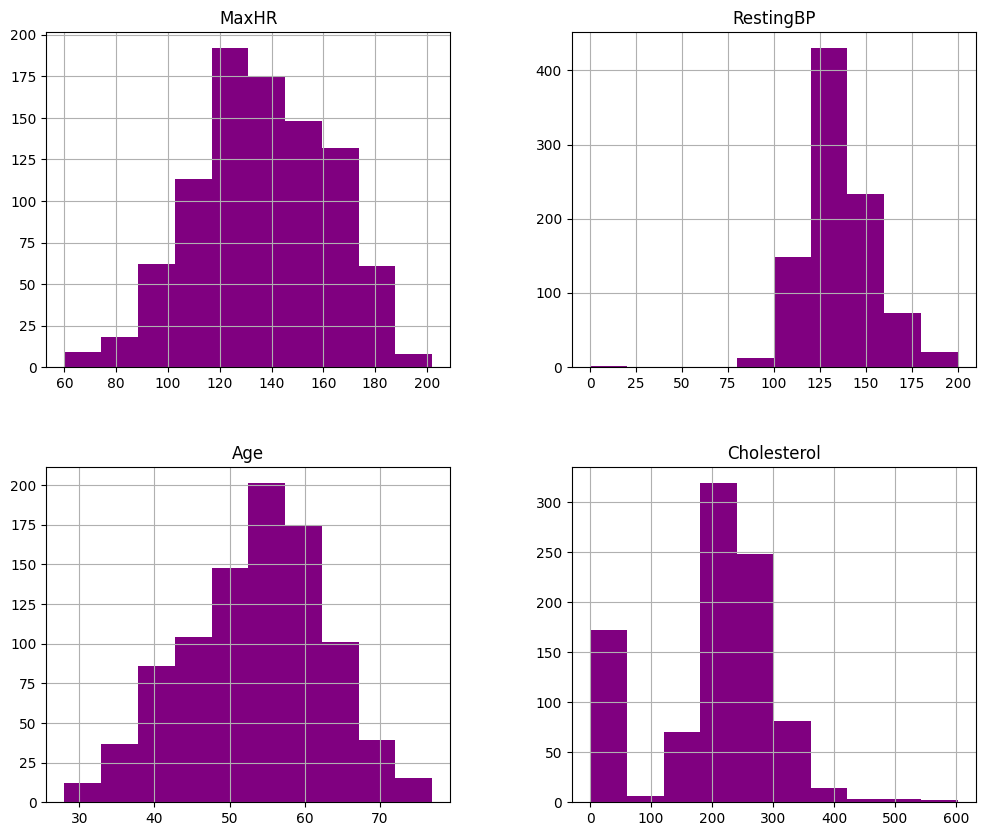

In [8]:
features = list(set(df.columns) - set(['Oldpeak', 'FastingBS', 'HeartDisease']))

df[features].hist(figsize=(12,10), color='purple');

In [9]:
# Видим значение RestingBP и Cholesterol = 0, удалим выброс
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [10]:
# Удаляем параметр с нулевым 'RestingBP'
df.drop(index=449, inplace=True)

In [11]:
# Выведем параметры с 'Cholesterol' = 0
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [12]:
# Обьединим все строки с 'Cholesterol' = 0 и удалим с DataFrame

index_zero = list(df[df['Cholesterol'] == 0].index)
df.drop(index= index_zero, inplace=True)

In [13]:
# Расчитываем количество выбросов
import numpy as np
import pandas as pd

# Рассчитываем квартиль и межквартильный размах для нужного столбца
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = df[(df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)]

# Количество выбросов
num_outliers = outliers.shape[0]

print(f'Количество выбросов параметра "RestingBP": {num_outliers}')



# Рассчитываем квартиль и межквартильный размах для нужного столбца
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = df[(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)]

# Количество выбросов
num_outliers = outliers.shape[0]

print(f'Количество выбросов параметра "Cholesterol": {num_outliers}')

Количество выбросов параметра "RestingBP": 20
Количество выбросов параметра "Cholesterol": 23


In [33]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

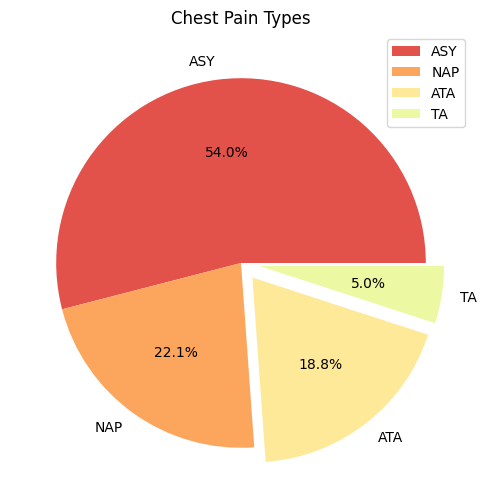

In [43]:
# Проанализируем стобцец 'ChestPainType'

ChestPainType = df['ChestPainType'].value_counts()
ChestPainType

plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.0, 0.0, 0.1, 0.1], colors=sns.color_palette('Spectral'))
plt.title('Chest Pain Types')
plt.legend()
plt.show()

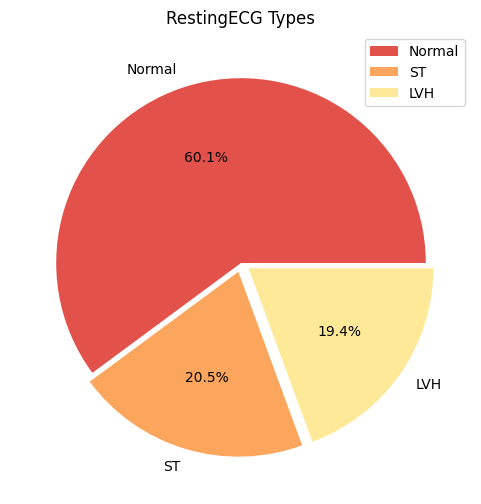

In [55]:
# Проанализируем стобцец 'RestingECG'

ChestPainType = df['RestingECG'].value_counts()
ChestPainType

plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['Normal', 'ST', 'LVH'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.0, 0.05, 0.05], colors=sns.color_palette('Spectral'))
plt.title('RestingECG Types')
plt.legend()
plt.show()

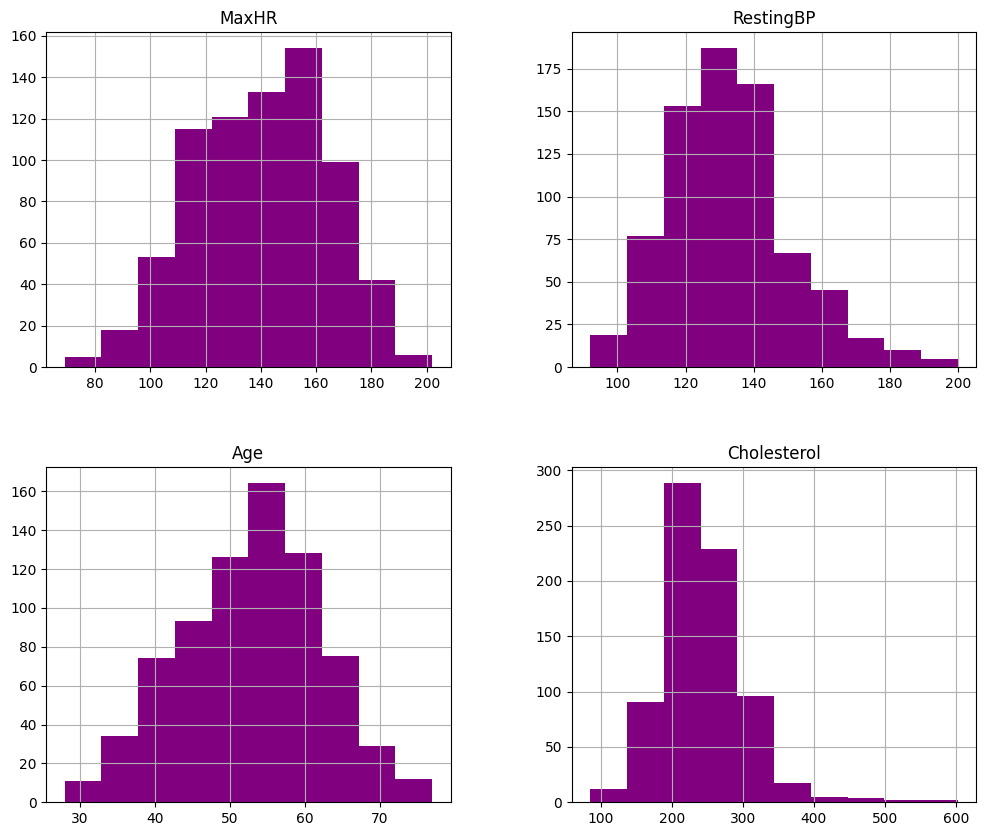

In [15]:
# Построим распределение числовых параметров в таблице

features = list(set(df.columns) - set(['Oldpeak', 'FastingBS', 'HeartDisease']))

df[features].hist(figsize=(12,10), color='purple');

## Визаулицация сердечной недостаточности

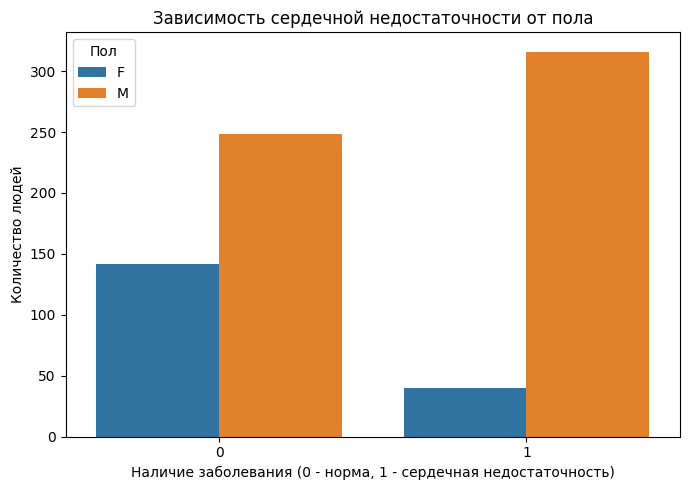

In [16]:
# Построим зависимость сердечной недостаточности от пола

import seaborn as sns
gender_counts = df.groupby(['HeartDisease', 'Sex']).size().reset_index(name='Count')

# Построим график
plt.figure(figsize=(7, 5))
sns.barplot(data=gender_counts, x='HeartDisease', y='Count', hue='Sex')

plt.title("Зависимость сердечной недостаточности от пола")
plt.xlabel("Наличие заболевания (0 - норма, 1 - сердечная недостаточность)")
plt.ylabel("Количество людей")
plt.legend(title="Пол")
plt.tight_layout()
plt.show()

In [17]:
# Построим зависимость людей с сердечной недостаточностью от их возраста
# Создадим новый DataFrame только с людьми с сердечной недостаточностью
df_HeartDisease = df[df['HeartDisease'] == 1]
df_HeartDisease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


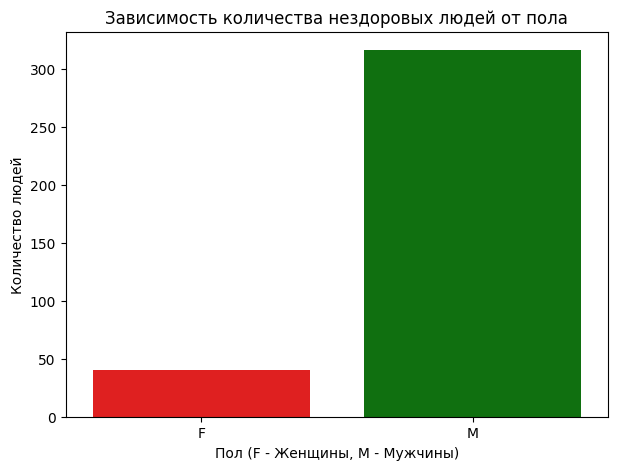

In [18]:
import seaborn as sns
gender_counts = df_HeartDisease.groupby(['Sex']).size().reset_index(name='Count')

# Построим график
plt.figure(figsize=(7, 5))
sns.barplot(data=gender_counts, x='Sex', y='Count', hue='Sex', palette = {'M': "green", 'F': "red"})

plt.title("Зависимость количества нездоровых людей от пола")
plt.xlabel("Пол (F - Женщины, M - Мужчины)")
plt.ylabel("Количество людей")
plt.show()

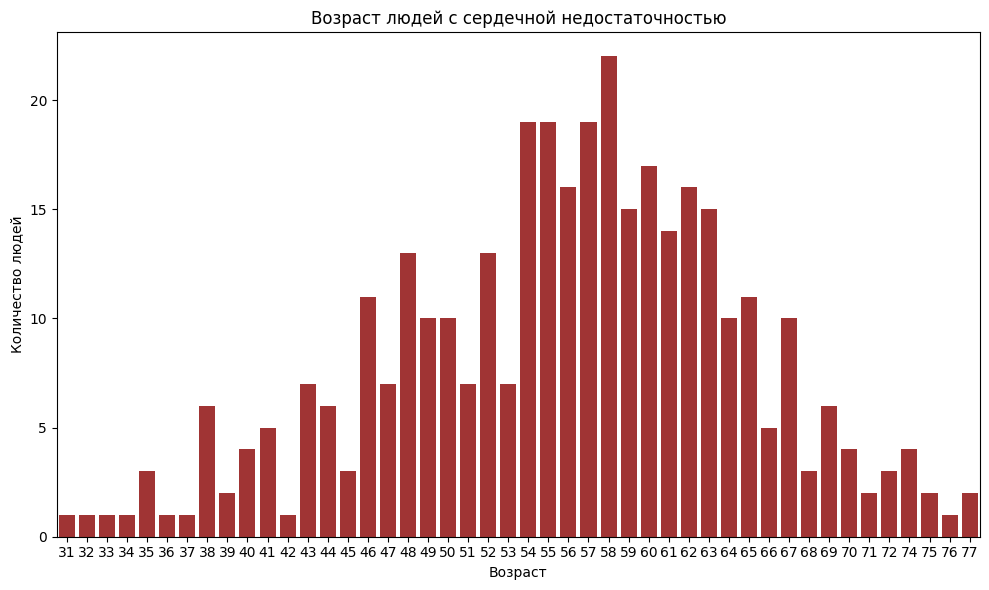

In [19]:
gender_counts = df_HeartDisease.groupby(['Age']).size().reset_index(name='Count')

# Построим график
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_counts, x='Age', y='Count', color='firebrick')

plt.title("Возраст людей с сердечной недостаточностью")
plt.xlabel("Возраст")
plt.ylabel("Количество людей")
plt.tight_layout()
plt.show()

<Axes: >

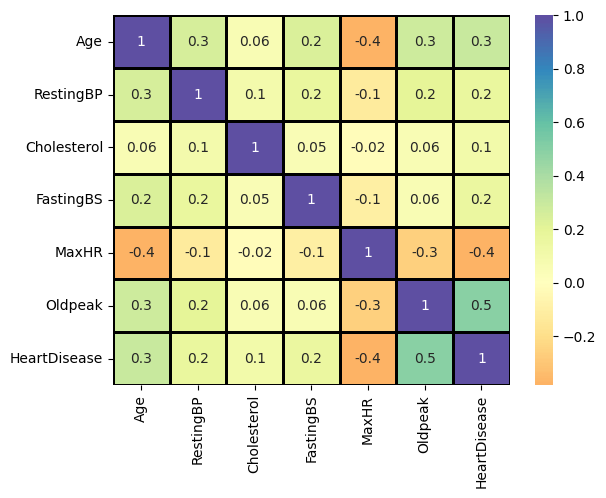

In [28]:
# Оценим кореляцию параметров
df_cor = df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1)


import seaborn as sns
sns.heatmap(df_cor.corr(), annot = True, fmt='.1g', vmax=1, center= 0, cmap= 'Spectral', linewidths=1, linecolor='black')

# Преобразование данных

In [29]:
# Транформируем значения колонок с нечисловыми параметрами
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()

df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# Предобработка данных

In [21]:
# Обозначим целевую переменную и остальные параметры как X и y
X = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [22]:
X.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2


In [23]:
y.value_counts()

HeartDisease
0    390
1    356
Name: count, dtype: int64

In [24]:
# Масштабирование данных
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Machine Learning Models

## Логистическая регрессия

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50) 

In [58]:
# Импорт библиотек
from sklearn.linear_model import LogisticRegression

In [59]:
linear_model = LogisticRegression()

linear_model.fit(X_train, y_train)

LogisticRegression()

In [60]:
print('Score на тренировочных данных = ', round(linear_model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(linear_model.score(X_test, y_test), 4))

Score на тренировочных данных =  0.8467
Score на тестовых данных =  0.8884


In [29]:
from sklearn.metrics import mean_absolute_error

In [50]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = linear_model.predict(X_test)

In [51]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [52]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.2596


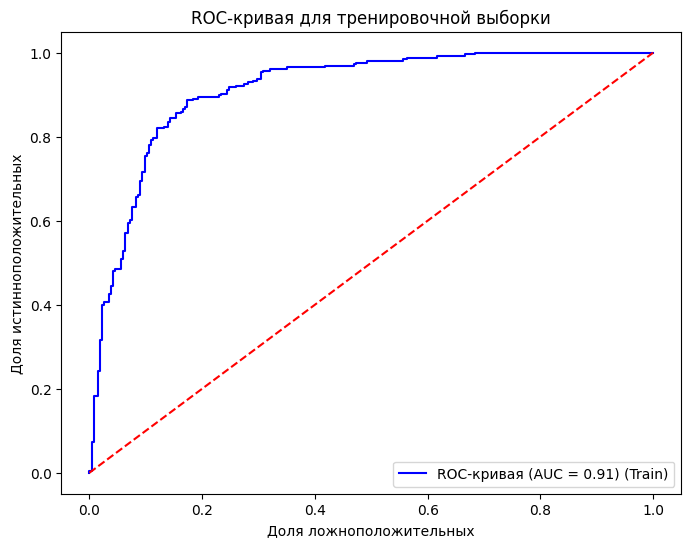

In [80]:
# Импорт библиотек
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Получаем вероятности принадлежности к положительному классу на тренировочной выборке
y_train_proba = linear_model.predict_proba(X_train)[:, 1]

# Вычисляем ROC-кривую и значение AUC для тренировочной выборки
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
auc_score = roc_auc_score(y_train, y_train_proba)

# Строим график ROC-кривой для тренировочной выборки
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {auc_score:.2f}) (Train)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тренировочной выборки')
plt.legend(loc="lower right")
plt.show()


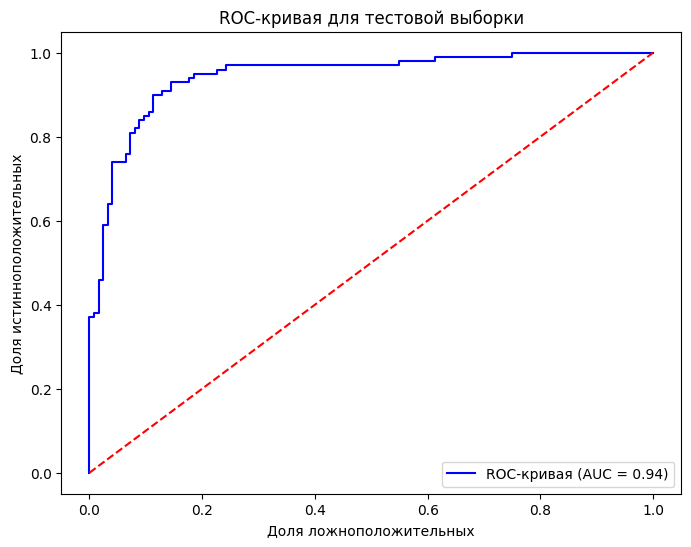

In [79]:
# Получаем вероятности принадлежности к положительному классу
y_test_proba = linear_model.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую и значение AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

# Строим график ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тестовой выборки')
plt.legend(loc="lower right")
plt.show()


## Решающие деревья

In [83]:
# Импорт библиотек
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [103]:
clf = tree.DecisionTreeClassifier()

parametrs = {'criterion': ['entropy'], 'max_depth': range(1, 10), 'max_features': range(1, 10), 'min_samples_leaf': range(1, 20)}

grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10),
                         'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 20)})

In [104]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 10}

In [105]:
best_clf = grid_search_cv_clf.best_estimator_

In [106]:
print('Score на тренировочных данных = ', round(best_clf.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf.score(X_test, y_test), 4))

Score на тренировочных данных =  0.864
Score на тестовых данных =  0.8438


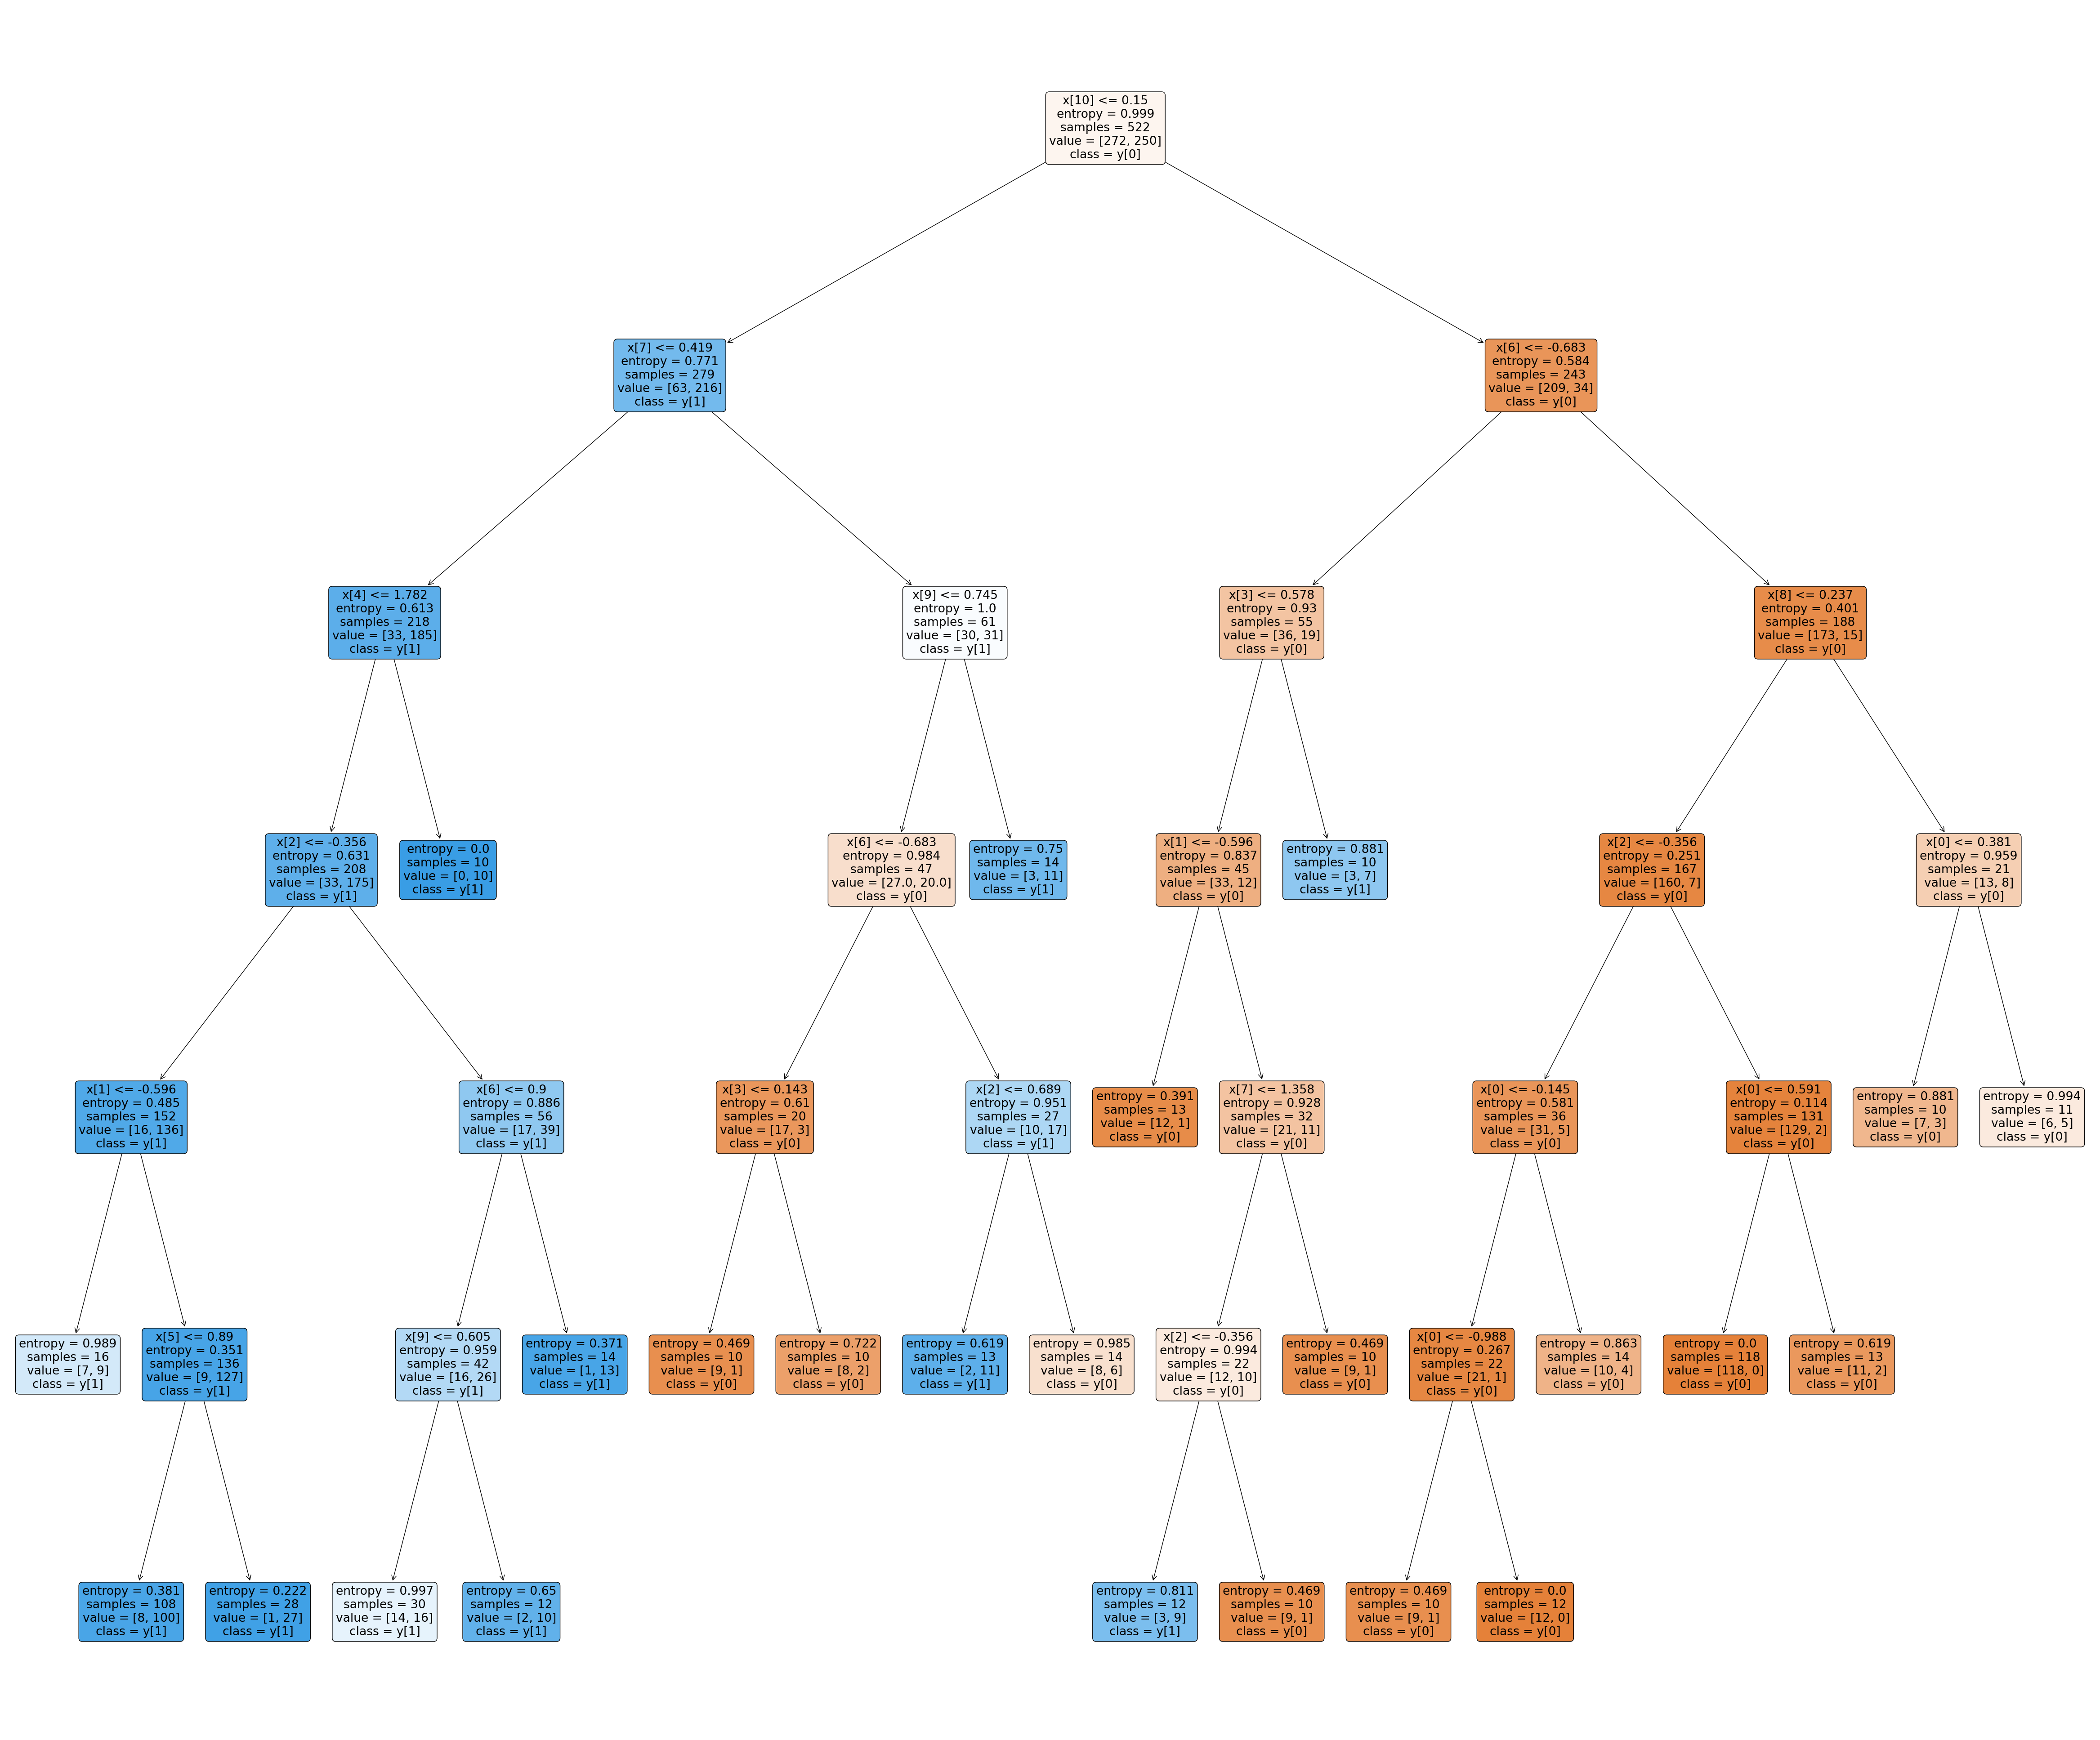

In [107]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60, 50))

plot_tree(
    best_clf, 
    filled=True, 
    feature_names=X_train.columns if hasattr(X_train, 'columns') else None, 
    class_names=True, 
    rounded=True
)

plt.show()

In [108]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_clf.predict(X_test)

In [109]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [110]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.1562


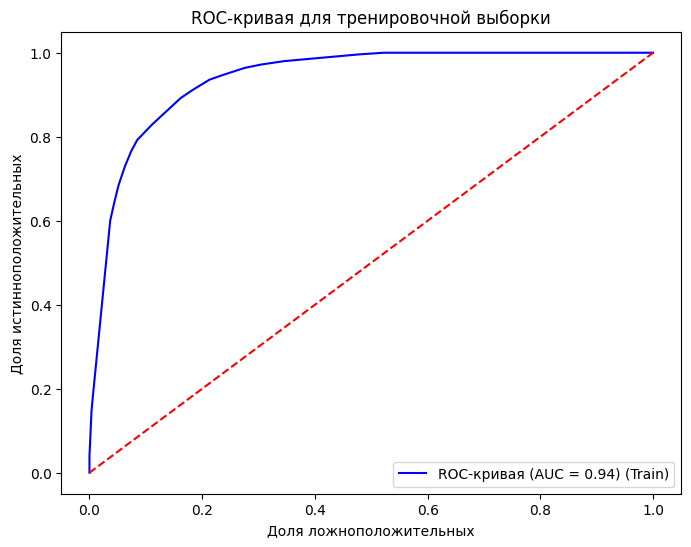

In [111]:
# Для тренировочной выборки
y_train_proba = best_clf.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
auc_score = roc_auc_score(y_train, y_train_proba)

# Строим график ROC-кривой для тренировочной выборки
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {auc_score:.2f}) (Train)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тренировочной выборки')
plt.legend(loc="lower right")
plt.show()


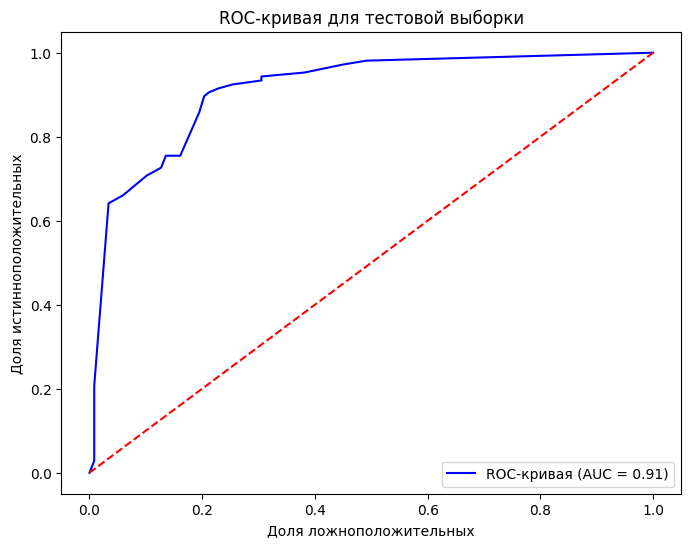

In [112]:
# Получаем вероятности принадлежности к положительному классу с помощью лучшей модели
y_test_proba = best_clf.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую и значение AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

# Строим график ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тестовой выборки')
plt.legend(loc="lower right")
plt.show()


## Случайный лес

In [42]:
# Импорт библиотек
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf_forest = RandomForestClassifier()

parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

grid_search_cv_forest = GridSearchCV(clf_forest, parametrs_fr, cv = 5)
grid_search_cv_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [44]:
grid_search_cv_forest.best_params_

{'max_depth': 10, 'max_features': 3, 'n_estimators': 200}

In [45]:
best_clf_rf = grid_search_cv_forest.best_estimator_

In [46]:
print('Score на тренировочных данных = ', round(best_clf_rf.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf_rf.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9981
Score на тестовых данных =  0.8571


In [47]:
y_test_pred = best_clf_rf.predict(X_test)

In [48]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.1429


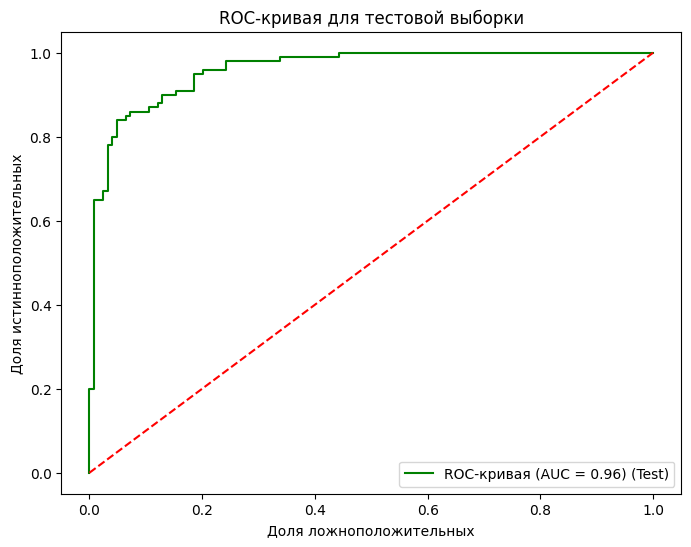

In [68]:
y_test_proba = best_clf_rf.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую и значение AUC для тестовой выборки
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
auc_score_test = roc_auc_score(y_test, y_test_proba)

# Строим график ROC-кривой для тестовой выборки
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label=f'ROC-кривая (AUC = {auc_score_test:.2f}) (Test)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тестовой выборки')
plt.legend(loc="lower right")
plt.show()

## Метод ближайших соседей

In [50]:
# Импорт библиотек
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

param_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': range(10, 50, 5)}

grid_search_knn = GridSearchCV(knn, param_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 50, 5),
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [52]:
grid_search_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 13,
 'weights': 'distance'}

In [53]:
best_clf_knn = grid_search_knn.best_estimator_

In [54]:
print('Score на тренировочных данных = ', round(best_clf_knn.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf_knn.score(X_test, y_test), 4))

Score на тренировочных данных =  1.0
Score на тестовых данных =  0.8705


In [55]:
y_test_pred = best_clf_knn.predict(X_test)

In [56]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.1295


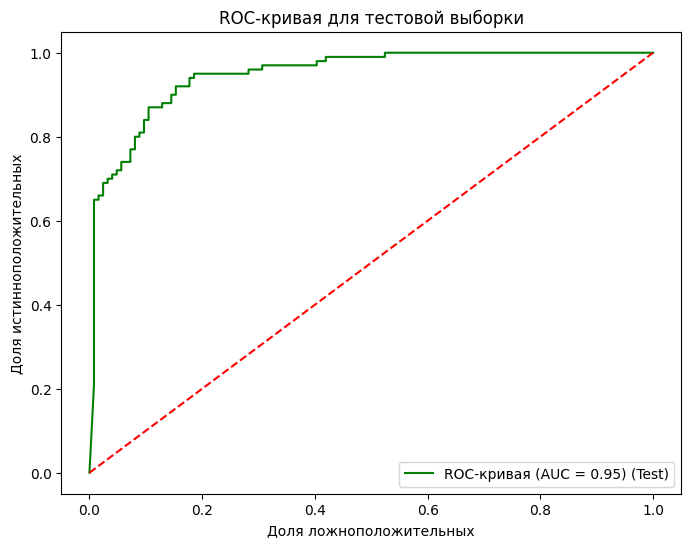

In [57]:

y_test_proba = best_clf_knn.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую и значение AUC для тестовой выборки
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
auc_score_test = roc_auc_score(y_test, y_test_proba)

# Строим график ROC-кривой для тестовой выборки
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label=f'ROC-кривая (AUC = {auc_score_test:.2f}) (Test)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тестовой выборки')
plt.legend(loc="lower right")
plt.show()

# Градиентный бустинг

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [59]:
clf_xgb = XGBClassifier()

parametrs_xgb = {
    'max_depth': [3, 5, 10],
    'n_estimators': [10, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_cv_xgb = GridSearchCV(clf_xgb, parametrs_xgb, cv=5)

grid_search_cv_xgb.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 100, 200],
                         'subsample': [0.8, 1.0]})

In [60]:
grid_search_cv_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 10,
 'n_estimators': 100,
 'subsample': 0.8}

In [61]:
best_clf_xgb = grid_search_cv_xgb.best_estimator_

In [62]:
print('Score на тренировочных данных = ', round(best_clf_xgb.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf_xgb.score(X_test, y_test), 4))

Score на тренировочных данных =  1.0
Score на тестовых данных =  0.8616


In [63]:
from sklearn.metrics import mean_absolute_error

In [64]:
y_test_pred = best_clf_xgb.predict(X_test)

In [65]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.1384


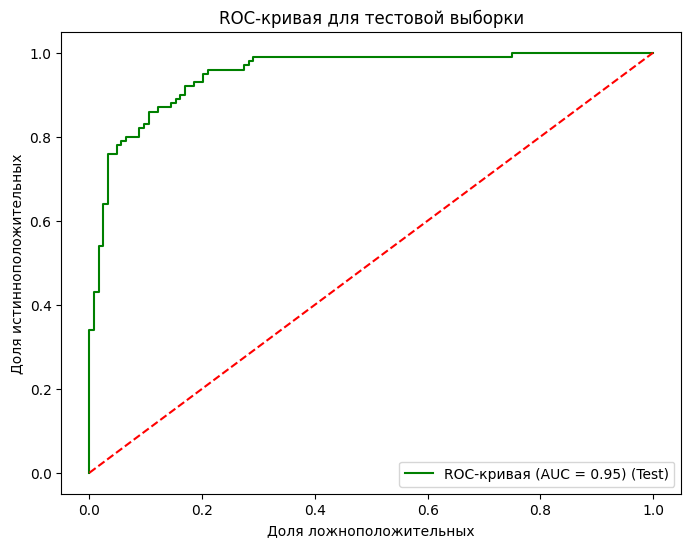

In [67]:
y_test_proba = best_clf_xgb.predict_proba(X_test)[:, 1]

# Вычисляем ROC-кривую и значение AUC для тестовой выборки
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
auc_score_test = roc_auc_score(y_test, y_test_proba)

# Строим график ROC-кривой для тестовой выборки
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label=f'ROC-кривая (AUC = {auc_score_test:.2f}) (Test)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая для тестовой выборки')
plt.legend(loc="lower right")
plt.show()

## Score всех моделей по убыванию                        

In [70]:
# print('Логистическая регрессия на тестовых данных = ',round(linear_model.score(X_test, y_test), 4) )
print('Логистическая регрессия на тестовых данных = 0.8884' )
print('Метод ближайших соседей на тестовых данных = ', round(best_clf_knn.score(X_test, y_test), 4))
print('Градиентный бустинг на тестовых данных = ', round(best_clf_xgb.score(X_test, y_test), 4))
print('Случайный лес на тестовых данных = ', round(best_clf_rf.score(X_test, y_test), 4))
print('Решающие деревья на тестовых данных = 0.8438')
# print('Решающие деревья на тестовых данных = ', round(best_clf.score(X_test, y_test), 4))



Логистическая регрессия на тестовых данных = 0.8884
Метод ближайших соседей на тестовых данных =  0.8705
Градиентный бустинг на тестовых данных =  0.8616
Случайный лес на тестовых данных =  0.8571
Решающие деревья на тестовых данных = 0.8438


# Построим confusion_matrix                         

In [46]:
# Импорт библиотек
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

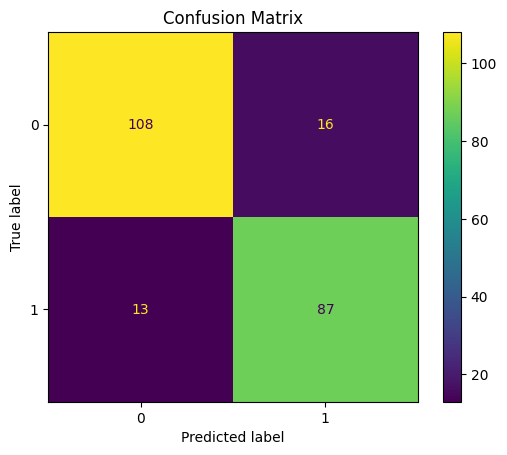

In [47]:
# Возьмем лучший класификатор - случайный лес
y_pred = best_clf_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Вывод по confusion_matrix
# True Positive (TP) - 108
# True Negative (TN) - 87
# False Positive (FP) - 16
# False Negative (FN) - 13